In [207]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 
pd.set_option('display.max_columns', 60)

# Import Dataset
______________________

In [208]:
df = pd.read_csv('housingproj.csv')

In [209]:
# Take a look at the data
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3.0,NaN,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4.0,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2.0,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3.0,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


# Data Investigation and Preperation
_______________________________________

In [210]:
df.describe()
df.shape

(21613, 21)

In [260]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'sqft_living15', 'sqft_lot15', 'was_renovated',
       'yr_built_0', 'yr_built_1', 'yr_built_2', 'yr_built_3'],
      dtype='object')

In [262]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21552 entries, 0 to 21612
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21552 non-null  float64
 1   bedrooms       21552 non-null  float64
 2   bathrooms      21552 non-null  float64
 3   sqft_living    21552 non-null  int64  
 4   sqft_lot       21552 non-null  int64  
 5   floors         21552 non-null  float64
 6   waterfront     21552 non-null  int64  
 7   view           21552 non-null  int64  
 8   condition      21552 non-null  int64  
 9   grade          21552 non-null  int64  
 10  sqft_above     21552 non-null  int64  
 11  sqft_basement  21552 non-null  int64  
 12  sqft_living15  21552 non-null  int64  
 13  sqft_lot15     21552 non-null  int64  
 14  was_renovated  21552 non-null  int64  
 15  yr_built_0     21552 non-null  int64  
 16  yr_built_1     21552 non-null  int64  
 17  yr_built_2     21552 non-null  int64  
 18  yr_bui

## Visualizing the Features with Low Values-Variation

<function matplotlib.pyplot.show(close=None, block=None)>

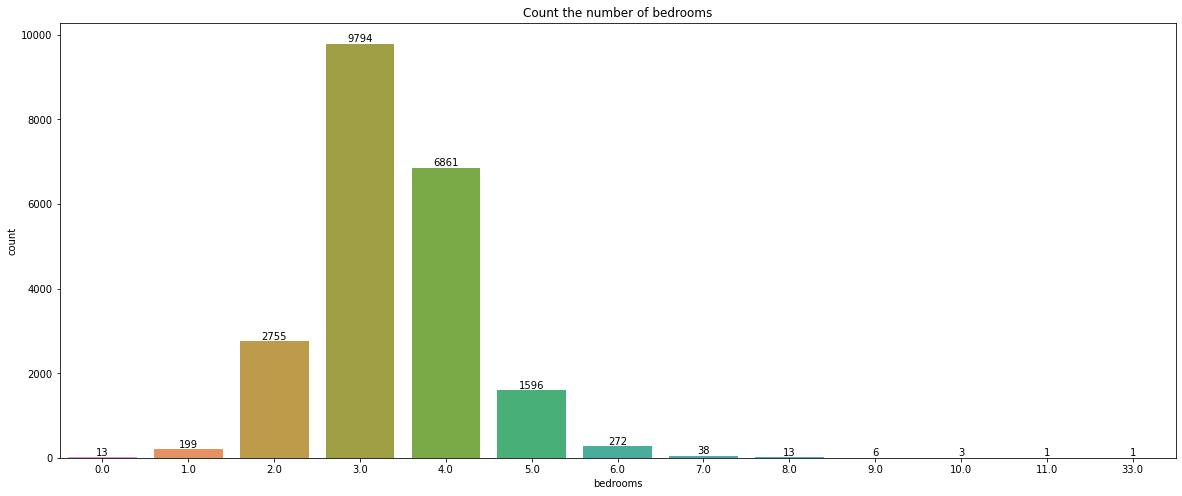

In [265]:
#Feature with high Values-Variation
plt.figure(figsize = (20,8))
plt.title('Count the number of bedrooms')
ax = sns.countplot(x='bedrooms', data=df)

ax.bar_label(ax.containers[0]);
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

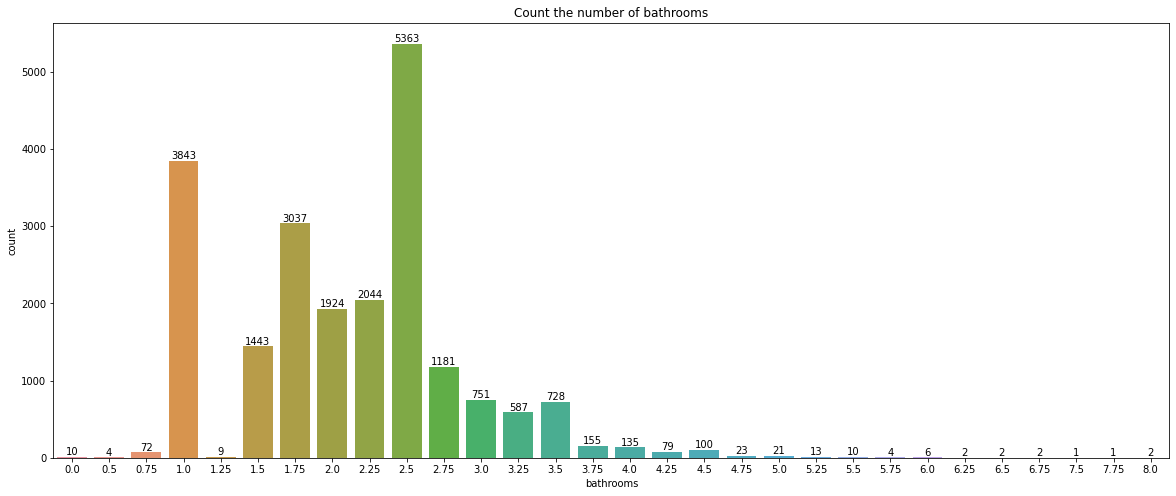

In [264]:
#Feature with high Values-Variation
plt.figure(figsize = (20,8))
plt.title('Count the number of bathrooms')
ax = sns.countplot(x='bathrooms', data=df)

ax.bar_label(ax.containers[0]);
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

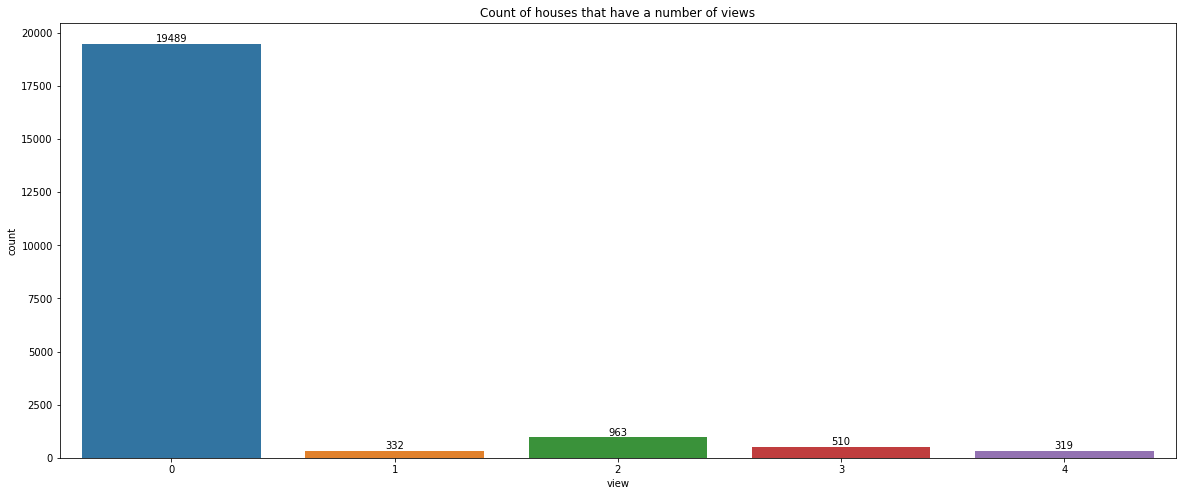

In [211]:
plt.figure(figsize = (20,8))
plt.title('Count of houses that have a number of views')
ax = sns.countplot(x='view', data=df)

ax.bar_label(ax.containers[0]);
plt.show

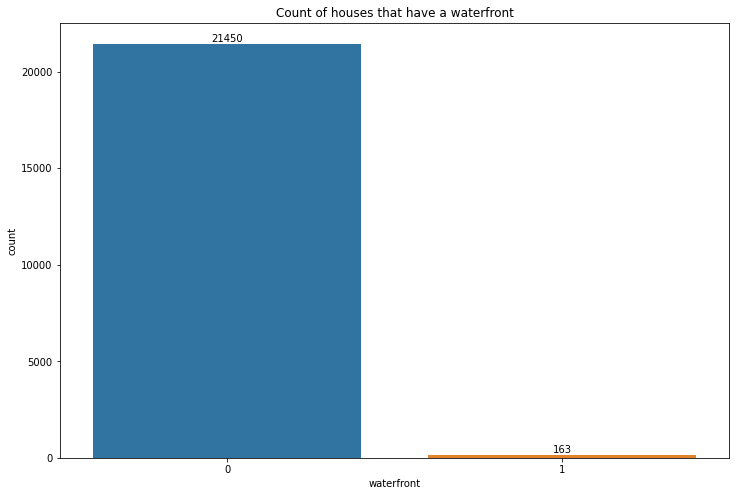

In [212]:
plt.figure(figsize = (12,8))
plt.title('Count of houses that have a waterfront')
ax = sns.countplot(x='waterfront', data=df);
ax.bar_label(ax.containers[0]);


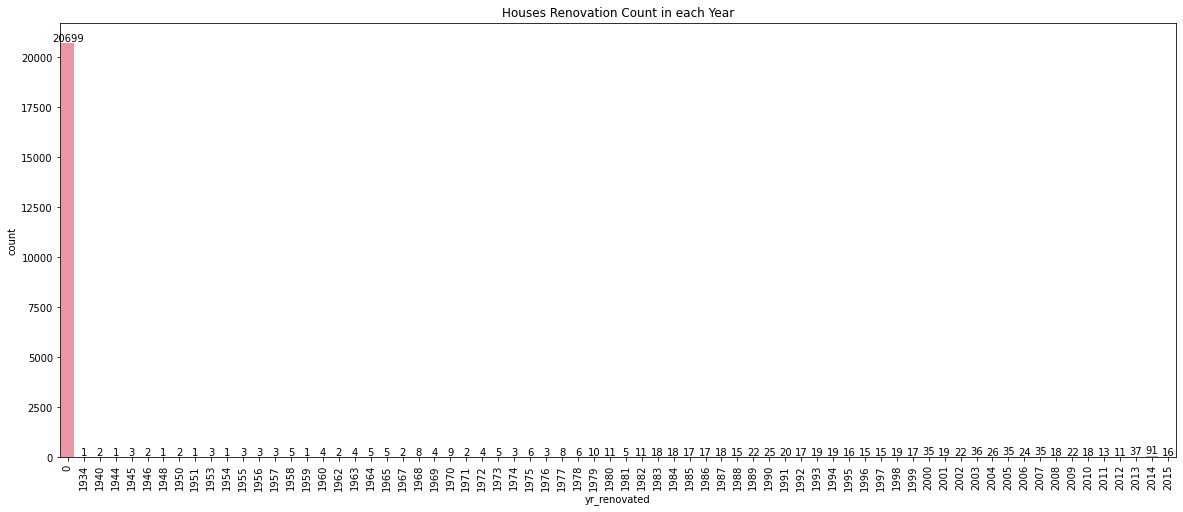

In [213]:
# Plot the count of renovation times in each year. The value 0 means no renovation done on the house.
plt.figure(figsize = (20,8))
plt.title("Houses Renovation Count in each Year")
plt.xticks(rotation=90)
ax = sns.countplot(x='yr_renovated', data=df)
ax.bar_label(ax.containers[0]);


> From the above stats, we can infere that:
- The features [`id`, `zipcode`, `lat`, `long`] should be dropped as they do not carry usefull info for the model.
- `yr_renovated` feature should be dropped and another feature can be added, `was_renovated`, which indicates if the house was renovated (1) or not (0).
- `yr_built` feature should be categarized, where the values of this feature to be in categorical order, based of the predefined year-intervals: 

                                        [MIN  -  Q25], (Q25  -  Q50], (Q50  -  Q75], (Q75  -  MAX]
                                        [1900 - 1951], [1952 - 1975], [1976 - 1997], [1998 - 2015] 


## Apply Data Processing Based on the Investigation Results
____________________________

In [214]:
# Drop unnecessary features
df.drop(['id', 'date', 'id', 'zipcode', 'lat', 'long'], axis=1, inplace=True)

In [215]:
# Create a new feature that is the indication of the house renovation status: 1 if renovation is done, 0 otherwise.
df['was_renovated'] = df['yr_renovated'].apply(lambda x: 1 if x > 0 else 0)
df.drop(['yr_renovated'], axis=1, inplace=True) # Drop the old feature

In [216]:
# Apply One-Hot Encoding to the feature yr_built, to create 4 new features:
# 1. yr_built_0: houses built between 1900 and 1951
# 2. yr_built_1: houses built between 1952 and 1975
# 3. yr_built_2: houses built between 1976 and 1997
# 4. yr_built_3: houses built after 1998

df['yr_built_0'] = df['yr_built'].apply(lambda x: 1 if x >= 1900 and x <= 1951 else 0)
df['yr_built_1'] = df['yr_built'].apply(lambda x: 1 if x >= 1952 and x <= 1975 else 0)
df['yr_built_2'] = df['yr_built'].apply(lambda x: 1 if x >= 1976 and x <= 1997 else 0)
df['yr_built_3'] = df['yr_built'].apply(lambda x: 1 if x >= 1998 else 0)

df.drop(['yr_built'], axis=1, inplace=True) # Drop the old feature

In [217]:
# Check NaN values
df.isnull().sum()

price             0
bedrooms         29
bathrooms        32
sqft_living       0
sqft_lot          0
floors            0
waterfront        0
view              0
condition         0
grade             0
sqft_above        0
sqft_basement     0
sqft_living15     0
sqft_lot15        0
was_renovated     0
yr_built_0        0
yr_built_1        0
yr_built_2        0
yr_built_3        0
dtype: int64

In [218]:
# Drop the houses that have NaN values in the features
df.dropna(inplace=True)

In [219]:
mean=df['bedrooms'].mean() #Imputation (replace the missing values of the column bedrooms with the mean of the column bedrooms)
df['bedrooms'].replace(np.nan,mean, inplace=True)

In [220]:
mean=df['bathrooms'].mean() #Imputation (replace the missing values of the column bathrooms with the mean of the column bathrooms)
df['bathrooms'].replace(np.nan,mean, inplace=True)


                                                    --------------- End Data Investigaton and Preperation ----------------- 

# Train-Test Sets Creation and Data Preprocessing 
______

In [221]:
# Split data into training and test sets
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(df, test_size=0.2, shuffle=True,random_state=42)

# Get the features in a dataframe and the target in a separate dataframe
train_input = train_data.drop(['price'], axis=1)
train_output = train_data['price']

test_input = test_data.drop(['price'], axis=1)
test_output = test_data['price']


In [222]:
# Apply StadardScaler to the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(train_input) # Fit the scaler only to the training data

# Get the scaled data 
scaled_train_input = scaler.transform(train_input)
scaled_test_input = scaler.transform(test_input)

                                               ----------------- End Train-Test Sets Creation and Data Preprocessing  ----------------- 

# Training Machine Learning Models
_________________

## Classical Models

In [223]:
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

In [224]:
# Create a SVR model and fit it to the scaled training data
svr_model_scaled = SVR(kernel='rbf', C=1e3, gamma='auto')
svr_model_scaled.fit(scaled_train_input, train_output)

SVR(C=1000.0, gamma='auto')

In [225]:
# Create a SVR model and fit it to the original (not scaled) training data
svr_model_original = SVR(kernel='rbf', C=1e3, gamma='auto')
svr_model_original.fit(train_input, train_output)

SVR(C=1000.0, gamma='auto')

In [226]:
# Create a KNN model and fit it to the scaled training data
knn_model_scaled = KNeighborsRegressor(n_neighbors=5)
knn_model_scaled.fit(scaled_train_input, train_output)

KNeighborsRegressor()

In [227]:
# Create a KNN model and fit it to the original training data
knn_model_original = KNeighborsRegressor(n_neighbors=5)
knn_model_original.fit(train_input, train_output)

KNeighborsRegressor()

# Ensemble Model

In [228]:
# Create a RandomForest ensemble model (of descion trees)  and fit it to the scaled training data
rf_model_scaled = RandomForestRegressor(n_estimators=500, random_state=42)
rf_model_scaled.fit(scaled_train_input, train_output)

RandomForestRegressor(n_estimators=500, random_state=42)

In [229]:
# Create a RandomForest ensemble model (of descion trees)  and fit it to the scaled training data
rf_model_original = RandomForestRegressor(n_estimators=500, random_state=42)
rf_model_original.fit(train_input, train_output)

RandomForestRegressor(n_estimators=500, random_state=42)

# Deep Learning

In [230]:
from __future__ import print_function
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras
from keras import metrics
from keras import regularizers
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import Adam, RMSprop
from keras.callbacks import TensorBoard, EarlyStopping, ModelCheckpoint
from keras.utils import plot_model
from keras.models import load_model

In [231]:
kc_data_org = pd.read_csv('housingproj.csv')

In [232]:
kc_data_org['sale_yr'] = pd.to_numeric(kc_data_org.date.str.slice(0, 4))
kc_data_org['sale_month'] = pd.to_numeric(kc_data_org.date.str.slice(4, 6))
kc_data_org['sale_day'] = pd.to_numeric(kc_data_org.date.str.slice(6, 8))

kc_data = pd.DataFrame(kc_data_org, columns=[
        'sale_yr','sale_month','sale_day',
        'bedrooms','bathrooms','sqft_living','sqft_lot','floors',
        'condition','grade','sqft_above','sqft_basement','yr_built',
        'zipcode','lat','long','sqft_living15','sqft_lot15','price'])
label_col = 'price'

print(kc_data.describe())


            sale_yr    sale_month      sale_day      bedrooms     bathrooms  \
count  21613.000000  21613.000000  21613.000000  21584.000000  21581.000000   
mean    2014.322954      6.574423     15.688197      3.370784      2.114765   
std        0.467616      3.115308      8.635063      0.930261      0.770306   
min     2014.000000      1.000000      1.000000      0.000000      0.000000   
25%     2014.000000      4.000000      8.000000      3.000000      1.750000   
50%     2014.000000      6.000000     16.000000      3.000000      2.250000   
75%     2015.000000      9.000000     23.000000      4.000000      2.500000   
max     2015.000000     12.000000     31.000000     33.000000      8.000000   

        sqft_living      sqft_lot        floors     condition         grade  \
count  21613.000000  2.161300e+04  21613.000000  21613.000000  21613.000000   
mean    2079.899736  1.510697e+04      1.494309      3.409430      7.656873   
std      918.440897  4.142051e+04      0.539989    

In [233]:
def train_validate_test_split(df, train_part=.6, validate_part=.2, test_part=.2, seed=None):
    np.random.seed(seed)
    total_size = train_part + validate_part + test_part
    train_percent = train_part / total_size
    validate_percent = validate_part / total_size
    test_percent = test_part / total_size
    perm = np.random.permutation(df.index)
    m = len(df)
    train_end = int(train_percent * m)
    validate_end = int(validate_percent * m) + train_end
    train = perm[:train_end]
    validate = perm[train_end:validate_end]
    test = perm[validate_end:]
    return train, validate, test

In [255]:
train_size, valid_size, test_size = (80, 20, 0)
kc_train, kc_valid, kc_test = train_validate_test_split(kc_data, 
                              train_part=train_size, 
                              validate_part=valid_size,
                              test_part=test_size,
                              seed=2000)

In [235]:
kc_y_train = kc_data.loc[kc_train, [label_col]]
kc_x_train = kc_data.loc[kc_train, :].drop(label_col, axis=1)
kc_y_valid = kc_data.loc[kc_valid, [label_col]]
kc_x_valid = kc_data.loc[kc_valid, :].drop(label_col, axis=1)

print('Size of training set: ', len(kc_x_train))
print('Size of validation set: ', len(kc_x_valid))
print('Size of test set: ', len(kc_test), '(not converted)')

Size of training set:  15129
Size of validation set:  6483
Size of test set:  1 (not converted)


In [236]:
def norm_stats(df1, df2):
    dfs = df1.append(df2)
    minimum = np.min(dfs)
    maximum = np.max(dfs)
    mu = np.mean(dfs)
    sigma = np.std(dfs)
    return (minimum, maximum, mu, sigma)

In [237]:
def z_score(col, stats):
    m, M, mu, s = stats
    df = pd.DataFrame()
    for c in col.columns:
        df[c] = (col[c]-mu[c])/s[c]
    return df

In [238]:
stats = norm_stats(kc_x_train, kc_x_valid)
arr_x_train = np.array(z_score(kc_x_train, stats))
arr_y_train = np.array(kc_y_train)
arr_x_valid = np.array(z_score(kc_x_valid, stats))
arr_y_valid = np.array(kc_y_valid)

print('Training shape:', arr_x_train.shape)
print('Training samples: ', arr_x_train.shape[0])
print('Validation samples: ', arr_x_valid.shape[0])

C:\Users\HP\AppData\Local\Temp\ipykernel_8820\686725769.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfs = df1.append(df2)
c:\Users\HP\AppData\Local\Programs\Python\Python38\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
c:\Users\HP\AppData\Local\Programs\Python\Python38\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)


Training shape: (15129, 18)
Training samples:  15129
Validation samples:  6483


c:\Users\HP\AppData\Local\Programs\Python\Python38\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [239]:
def basic_model_1(x_size, y_size):
    t_model = Sequential()
    t_model.add(Dense(100, activation="tanh", input_shape=(x_size,)))
    t_model.add(Dense(50, activation="relu"))
    t_model.add(Dense(y_size))
    print(t_model.summary())
    t_model.compile(loss='mean_squared_error',
        optimizer=Adam(),
        metrics=[metrics.mae])
    return(t_model)

In [240]:
def basic_model_2(x_size, y_size):
    t_model = Sequential()
    t_model.add(Dense(100, activation="tanh", input_shape=(x_size,)))
    t_model.add(Dropout(0.1))
    t_model.add(Dense(50, activation="relu"))
    t_model.add(Dense(20, activation="relu"))
    t_model.add(Dense(y_size))
    print(t_model.summary())
    t_model.compile(loss='mean_squared_error',
        optimizer=Adam(),
        metrics=[metrics.mae])
    return(t_model)

In [241]:
def basic_model_3(x_size, y_size):
    t_model = Sequential()
    t_model.add(Dense(80, activation="tanh", kernel_initializer='normal', input_shape=(x_size,)))
    t_model.add(Dropout(0.2))
    t_model.add(Dense(120, activation="relu", kernel_initializer='normal', 
        kernel_regularizer=regularizers.l1(0.01), bias_regularizer=regularizers.l1(0.01)))
    t_model.add(Dropout(0.1))
    t_model.add(Dense(20, activation="relu", kernel_initializer='normal', 
        kernel_regularizer=regularizers.l1_l2(0.01), bias_regularizer=regularizers.l1_l2(0.01)))
    t_model.add(Dropout(0.1))
    t_model.add(Dense(10, activation="relu", kernel_initializer='normal'))
    t_model.add(Dropout(0.0))
    t_model.add(Dense(y_size))
    t_model.compile(loss='mean_squared_error',
        optimizer='nadam',
        metrics=[metrics.mae])
    return(t_model)

In [242]:
model = basic_model_3(arr_x_train.shape[1], arr_y_train.shape[1])
model.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_61 (Dense)            (None, 80)                1520      
                                                                 
 dropout_4 (Dropout)         (None, 80)                0         
                                                                 
 dense_62 (Dense)            (None, 120)               9720      
                                                                 
 dropout_5 (Dropout)         (None, 120)               0         
                                                                 
 dense_63 (Dense)            (None, 20)                2420      
                                                                 
 dropout_6 (Dropout)         (None, 20)                0         
                                                                 
 dense_64 (Dense)            (None, 10)              

In [243]:
epochs = 500
batch_size = 128

print('Epochs: ', epochs)
print('Batch size: ', batch_size)

Epochs:  500
Batch size:  128


In [244]:
keras_callbacks = [ EarlyStopping(monitor='val_mean_absolute_error', patience=20, verbose=0)
]

In [245]:
history = model.fit(arr_x_train, arr_y_train,
    batch_size=batch_size,
    epochs=epochs,
    shuffle=True,
    verbose=0, # Change it to 2, if wished to observe execution
    validation_data=(arr_x_valid, arr_y_valid),
    callbacks=keras_callbacks)

# Models Evaluation
______________________

In [246]:
# Get the predictions based on the test set inputs and compare results with the test set actual outputs
# Find the mean absolute error for each model

# SVR Model
scaled_svr_predictions = svr_model_scaled.predict(scaled_test_input)
original_svr_predictions = svr_model_original.predict(test_input)

# KNN Model
scaled_knn_predictions = knn_model_scaled.predict(scaled_test_input)
original_knn_predictions = knn_model_original.predict(test_input)

# RandomForest Model
scaled_rf_predictions = rf_model_scaled.predict(scaled_test_input)
original_rf_predictions = rf_model_original.predict(test_input)

In [247]:
# Calculate the mean absolute error for the scaled and unscaled models (SVR)
mae_svr_scaled = int(mean_absolute_error(test_output, scaled_svr_predictions))
mae_svr_original = int(mean_absolute_error(test_output, original_svr_predictions))

print('Mean Absolute Error for the scaled SVR model:', mae_svr_scaled, '$')
print('Mean Absolute Error for the original SVR model:', mae_svr_original, '$')

Mean Absolute Error for the scaled SVR model: 155004 $
Mean Absolute Error for the original SVR model: 221227 $


In [248]:
# Calculate the mean absolute error for the scaled and unscaled models (KNN)
mae_knn_scaled = int(mean_absolute_error(test_output, scaled_knn_predictions))
mae_knn_original = int(mean_absolute_error(test_output, original_knn_predictions))


print('Mean Absolute Error for the scaled KNN model:', mae_knn_scaled, '$')
print('Mean Absolute Error for the original KNN model:', mae_knn_original, '$')

Mean Absolute Error for the scaled KNN model: 132902 $
Mean Absolute Error for the original KNN model: 160034 $


In [249]:
# Calculate the mean absolute error for the scaled and unscaled models (RandomForest)
mae_rf_scaled = int(mean_absolute_error(test_output, scaled_rf_predictions))
mae_rf_original = int(mean_absolute_error(test_output, original_rf_predictions))

print('Mean Absolute Error for the scaled RandomForest model:', mae_rf_scaled, '$')
print('Mean Absolute Error for the original RandomForest model:', mae_rf_original, '$')

Mean Absolute Error for the scaled RandomForest model: 117725 $
Mean Absolute Error for the original RandomForest model: 117696 $


In [257]:
train_score = model.evaluate(arr_x_train, arr_y_train, verbose=0)
valid_score = model.evaluate(arr_x_valid, arr_y_valid, verbose=0)

print('Train MAE: ', round(train_score[1], 4), ', Train Loss: ', round(train_score[0], 4)) 
print('Val MAE: ', round(valid_score[1], 4), ', Val Loss: ', round(valid_score[0], 4))

Train MAE:  nan , Train Loss:  nan
Val MAE:  nan , Val Loss:  nan


In [251]:
def plot_hist(h, xsize=6, ysize=10):
    # Prepare plotting
    fig_size = plt.rcParams["figure.figsize"]
    plt.rcParams["figure.figsize"] = [xsize, ysize]
    fig, axes = plt.subplots(nrows=4, ncols=4, sharex=True)
    
    # summarize history for MAE
    plt.subplot(211)
    plt.plot(h['mean_absolute_error'])
    plt.plot(h['val_mean_absolute_error'])
    plt.title('Training vs Validation MAE')
    plt.ylabel('MAE')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    
    # summarize history for loss
    plt.subplot(212)
    plt.plot(h['loss'])
    plt.plot(h['val_loss'])
    plt.title('Training vs Validation Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    
    # Plot it all in IPython (non-interactive)
    plt.draw()
    plt.show()

    return

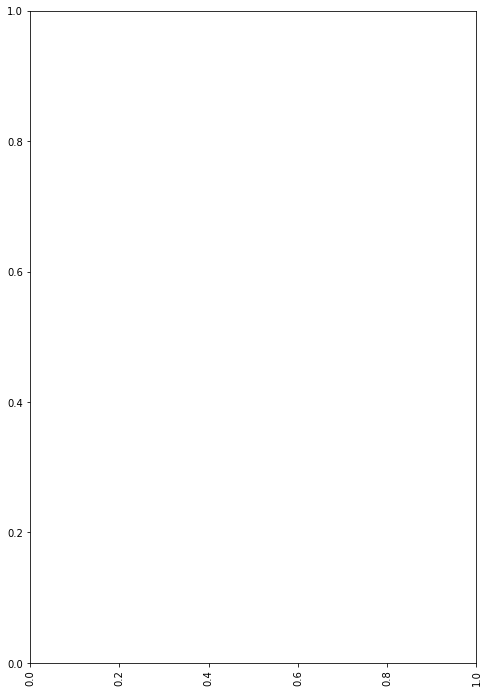

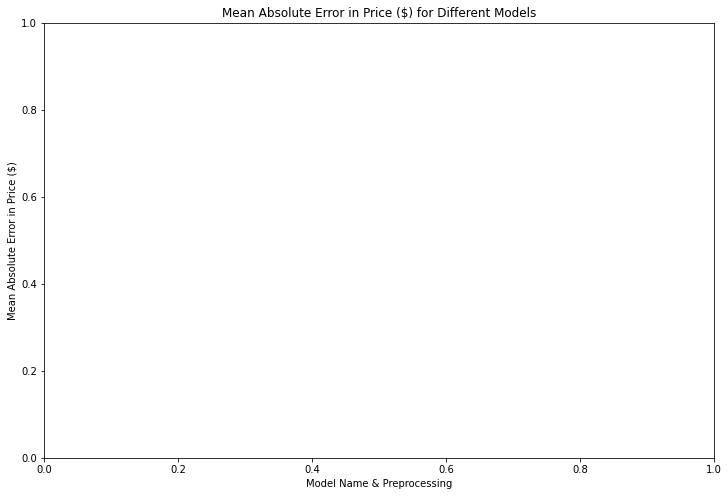

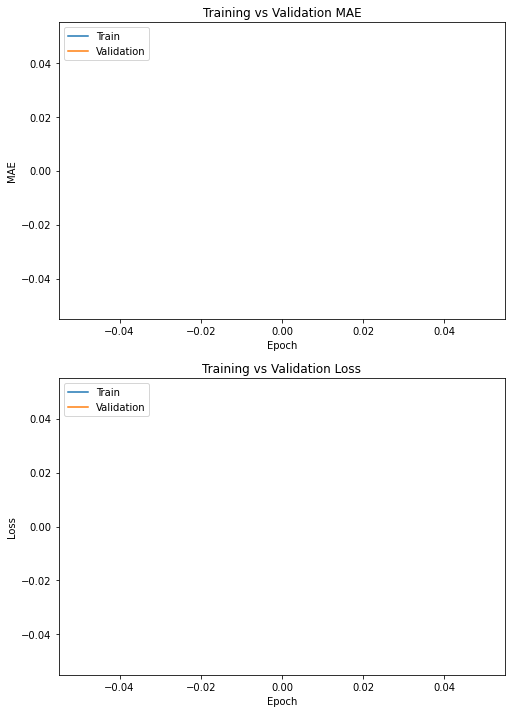

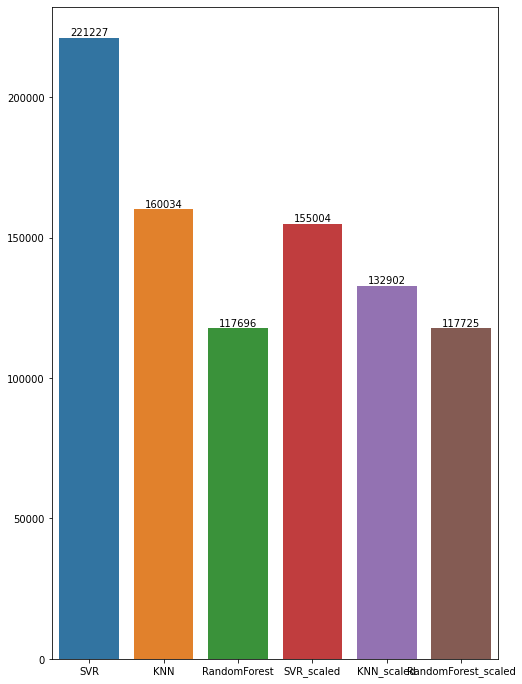

In [259]:
plt.xticks(rotation=90)
plt.figure(figsize=(12,8))
plt.xlabel('Model Name & Preprocessing')
plt.ylabel('Mean Absolute Error in Price ($)')
plt.title('Mean Absolute Error in Price ($) for Different Models')
plot_hist(history.history, xsize=8, ysize=12)
ax = sns.barplot(x=['SVR', 'KNN', 'RandomForest', 'SVR_scaled', 'KNN_scaled', 'RandomForest_scaled'], y=[mae_svr_original, mae_knn_original, mae_rf_original , mae_svr_scaled, mae_knn_scaled, mae_rf_scaled]);
ax.bar_label(ax.containers[0]);
plt.show()

> By evaluating models, we can infere that:
- RandomForest (ensemble) model has the lowast errors
- Scaling the data for the non-ensemble models enhanced their performance dramatically.
- Ensemble model did not greatly affected by data scaling, because (in this case) it was based on non-parameteric algorithm (Decision Trees).